In [1]:
# import quandl
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt



c:\Users\Xunjing\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
# Get the stock data
df = pd.read_csv('GOOG-year.csv')
df = df[['Date','Open','High','Low','Adj Close','Volume']]
df['HL_PCT'] = (df['High'] - df['Adj Close']) / df['Adj Close'] * 100.0
df['PCT_change'] = (df['Adj Close'] - df['Open']) / df['Open'] * 100.0
# 真正用的特征
df = df[['Adj Close', 'HL_PCT', 'PCT_change', 'Volume']]
df = df[['Adj Close']]
#预测后30天的股价
forecast_out = 30
# create another column, (the target or dependent variable), shifted n units up
df['Prediction'] = df[['Adj Close']].shift(-forecast_out)



In [10]:
# Create the independent data set (X)
# Convert the dataframe to a numpy array
X = np.array(df.drop(['Prediction'],1))
# Remove the last n rows
X = X[:-forecast_out]
y = np.array(df['Prediction'])
y = y[:-forecast_out]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.133)
# Set x_forecast equal to the last 30 rows of the original data set from Adj Close column
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]

C:\Users\Xunjing\AppData\Local\Temp/ipykernel_29136/3682553409.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Prediction'],1))
C:\Users\Xunjing\AppData\Local\Temp/ipykernel_29136/3682553409.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]


In [4]:
def linear_reg():
    # Create and train the Linear Regression Model
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    lr_forecast_set = lr.predict(X_test)
    # print(len(lr_forecast_set))
    lr_prediction = lr.predict(x_forecast)
    np.savetxt('lr_prediction.csv',lr_prediction, delimiter=',')
    return lr_forecast_set

In [11]:
def svr_reg():
    # Create and train the SVR
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
    svr_rbf.fit(X_train, y_train)
    svr_forecast_set = svr_rbf.predict(X_test)
    # print(lr_forecast_set)
    svm_prediction = svr_rbf.predict(x_forecast)
    np.savetxt('svm_prediction.csv', svm_prediction, delimiter=',')
    return svr_forecast_set

In [6]:
# Original stock price
z = np.array(df['Adj Close'])
z = z[-forecast_out:]

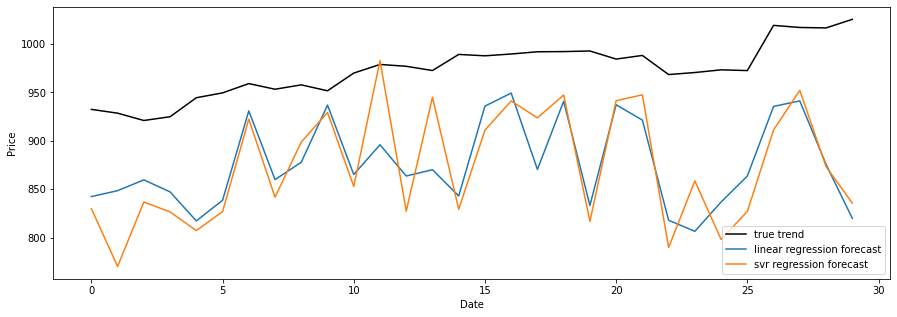

In [12]:
# style.use('ggplot')
# plot
lr_forecast = linear_reg()
svr_forecast = svr_reg()
plt.figure(figsize=(15,5))
plt.plot(z,label='true trend',c='black')
plt.plot(lr_forecast,label='linear regression forecast')
plt.plot(svr_forecast,label='svr regression forecast')
# plt.plot(lr_prediction,label='prediction')
# df['Adj Close'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [14]:
def calculate_accuracy(real, predict):
    real = np.array(real) + 1
    predict = np.array(predict) + 1
    percentage = 1 - np.sqrt(np.mean(np.square((real - predict) / real)))
    return percentage * 100
print('linear regression acc is: %.4f'%calculate_accuracy(z,lr_forecast))
print('svr regression acc is: %.4f'%calculate_accuracy(z,svr_forecast))

linear regression acc is: 89.1361
svr regression acc is: 88.3881
